# 9 数字图像处理

## 9.1 传统计算机视觉<br>

#### 传统计算机视觉的主要特点是：**依赖手工提取特征。**<br>

传统计算机视觉主要依赖于手工设计的特征（如SIFT，HOG等）与经典算法（如模板匹配，特征点检测与描述等），来实现图像的理解与分析。这种方法需要领域专家根据特定任务来精心挑选或设计特征，以捕捉图像中的关键信息。然而，由于缺乏对特征的自动学习能力，传统方法在处理复杂视觉任务时往往受限于特征表达能力和泛化性能。相比之下，现代深度学习技术能够自动从大量数据中学习到有效的特征表示，从而在很多视觉任务上取得了显著的成功。<br><br>

SIFT（Scale-Invariant Feature Transform，尺度不变特征变换）：SIFT是一种用于图像特征检测和描述的方法，由David Lowe提出。它能够检测出图像中的关键点（也称兴趣点），并且描述这些关键点周围的局部区域。SIFT特征具有尺度不变性和旋转不变性，这意味着即使图像大小或角度发生变化，也能识别出相同的特征。这一特性使得SIFT非常适合用于物体识别、图像拼接以及机器人定位等领域。<br>

 HOG（Histogram of Oriented Gradients，梯度方向直方图）：主要用于物体检测，特别是行人检测。它通过计算并统计图像中局部区域（cell）的梯度方向直方图来形成特征描述。HOG特征利用了局部像素强度变化的信息，即边缘和轮廓信息，这些信息对于识别物体是非常重要的。为了减少光照和阴影变化的影响，HOG通常是在图像的每个小块内计算梯度，然后将这些梯度按照方向分组，并统计各个方向上的梯度数量，形成一个直方图。这种方法可以有效地捕捉物体的形状信息。

想提取下面图片的边缘像素，有哪些特征：<br>

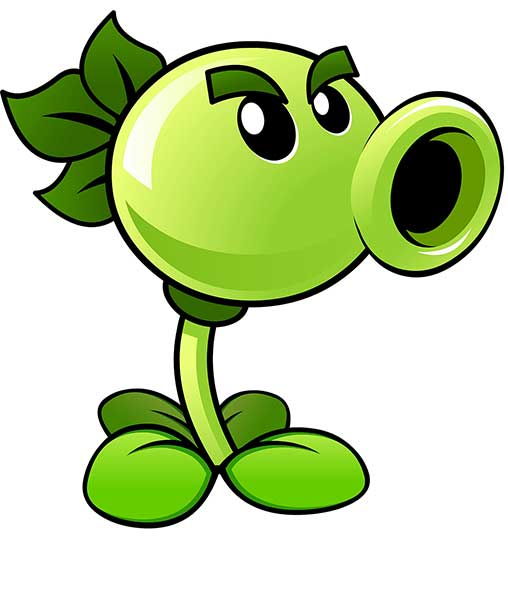

上图中，边缘像素的为黑色，我们只需要将亮度小于10的像素保留，亮度大于10的像素填充为白色，即可得到边缘像素。

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/kaggle/input/new_image.jpg')
#如果图片发生改变，则边缘检测的效果无法保证
#img = Image.open('/kaggle/input/snowpea.jpg')

#img = Image.open('new_image.jpg')
#如果图片发生改变，则边缘检测的效果无法保证
#img = Image.open('snowpea.jpg')

#获取图片的尺寸
width, height = img.size

#将图片转化为灰度
imgedge = img.convert('L')

#遍历每一个像素
for x in range(width):
    for y in range(height):
        r = imgedge.getpixel((x,y))
        #像素的亮度大于10，则将该像素填充为白色
        if r > 10:
            imgedge.putpixel((x,y), (255))

plt.subplot(121)
plt.imshow(img)
plt.axis('off')  # 关闭坐标轴
plt.subplot(122)
plt.imshow(imgedge, cmap='gray')
plt.axis('off')  # 关闭坐标轴

plt.show()

## 9.2 传统计算机视觉的局限性

### 小狗

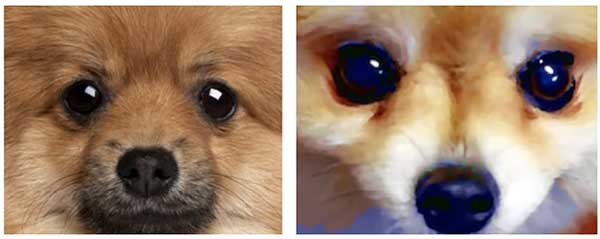

从上面的图像中，一个简单的规则可能是如果一张图像包含三个呈三角形排列的黑色圆圈，那么它可以被分类为狗。然而，这一规则会在这张具有相似特征的松饼特写面前失效：

### 松饼

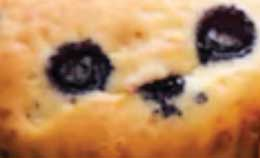

当然，这个特征在面对不是小狗脸部特写的图像时也会失败。所以在实践中，为了准确地分类图像，我们需要手动创建的规则数量可能会呈指数级增长，特别是在图像变得更加复杂的情况下。因此，传统方法在非常受限制的环境中（例如，拍摄护照照片，所有尺寸都在毫米范围内受到严格限制）表现良好，而在不受限制的环境中（每张图像都有很大差异）则表现不佳。

很难通过手工的方式提取高层次特征：

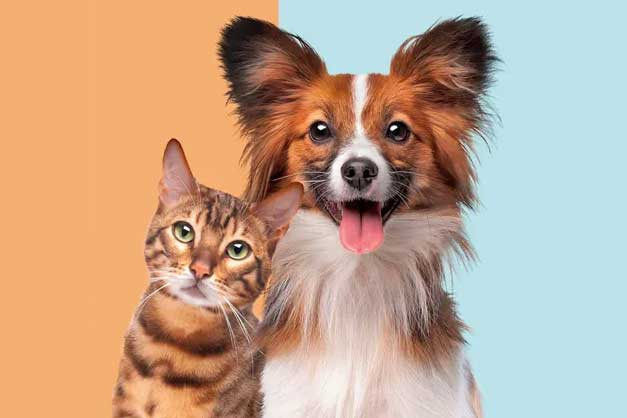

## 9.3 基于深度学习的计算机视觉





神经网络提供了一个独特的优势，即在单一过程同时进行**特征提取**）和使用这些特征进行**分类/回归**，几乎不需要手提取动特程整个过程只需要完成两个任务：<br>1、**已标的数据**（例如，哪些图片是狗，哪些不是狗<br>2、和一个神经网络架构。它不需要人类来制定规则来对图像进行分类，这减轻了传统技术对程序员的大部分负担<br>神经网络我们为需要解决是的任务提供相当标注数据的示例。例如，在前面的例子中，我们需要向模型提供多个狗和非狗的图片，以便它学习特征。神如何被用于分类任务的高层次视图如下：

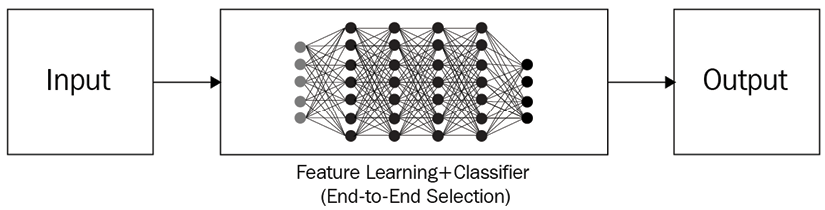

## 9.4 色彩空间

### 1、HSV：以人类直观感受为媒介的颜色模型<br>



通过：色相（Hue）、饱和度（Saturation）和亮度（Value）三个参数描述颜色。<br>



黑、白：无色相<br>



HSV色彩空间（Hue, Saturation, Value）是一种基于**人类直观感受**的颜色模型，常用于图像处理和计算机视觉领域。HSV色彩空间将颜色分为三个独立的分量：色相（Hue）、饱和度（Saturation）和亮度（Value）。色相（H）表示颜色的类型，通常用0到360度的角度值表示，红色对应0度或360度，绿色对应120度，蓝色对应240度；饱和度（S）表示颜色的纯度或鲜艳程度，范围从0到1，0表示灰色，1表示完全饱和的颜色；亮度（V）表示颜色的明暗程度，范围也是从0到1，0表示黑色，1表示最亮的颜色。HSV色彩空间的优势在于它能够更好地模拟人类对颜色的感知，

### 2、RGB：以发光物体（显示器）为媒介的色彩模式<br>



R：红<br>



G：绿<br>



B：蓝<br>



RGB: 光的三原色<br>



暗-->亮：0-->255



R=G=B 没有色相，灰值，只有明度<br>



RGB色彩空间是一种基于加法混色原理的颜色模型，广泛应用于**电子显示设备**，如计算机屏幕、电视和手机。在RGB色彩空间中，任何颜色都可以通过红（Red）、绿（Green）和蓝（Blue）三种基本颜色的不同强度组合而成。每种颜色的强度通常用0到255之间的整数值表示，其中0表示该颜色完全没有，255表示该颜色达到最大强度。例如，纯红色可以用 (255, 0, 0) 表示，纯绿色用 (0, 255, 0) 表示，纯蓝色用 (0, 0, 255) 表示，而白色则是三种颜色的全强度组合 (255, 255, 255)，黑色则是三种颜色的零强度组合 (0, 0, 0)。RGB色彩空间因其直观和易于实现的特点，成为数字图像处理和图形显示中**最常用**的颜色模型之一。

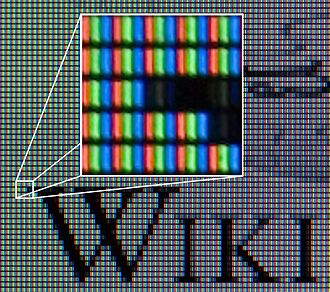

### RGB重叠部分为白色（想象没有点亮像素时，屏幕是黑色）<br><br>

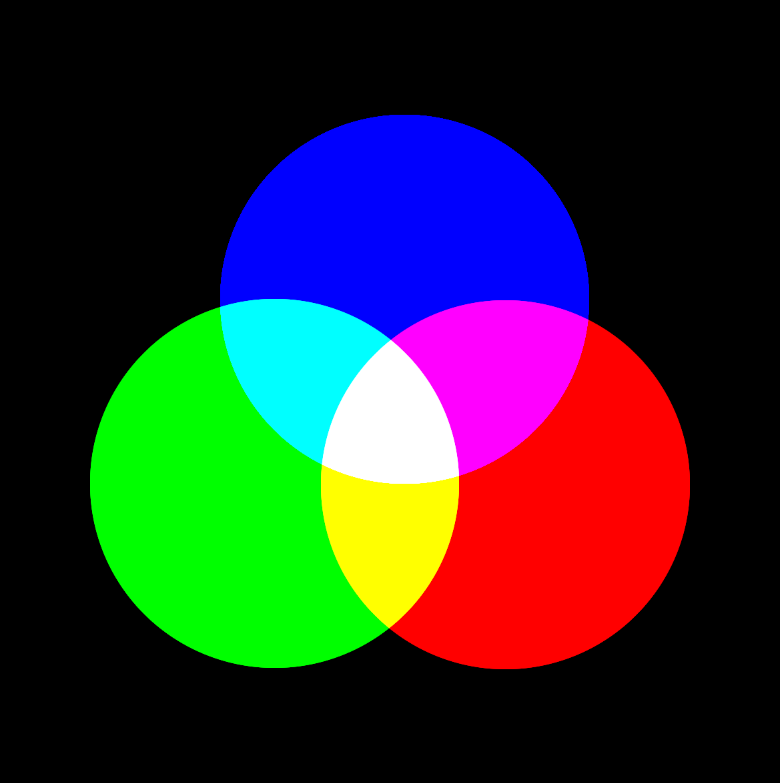

### 3、CMYK：以印刷（墨水）为媒介的颜色模型<br>



C：青<br>

M：品<br>

Y：黄<br>

K：黑，黑色可由青、品、黄三种颜色混合得到，但实际工艺达不到（色偏），所以使用单独的黑色墨水。<br>

CMY：墨的三原色<br>

浓、淡：0 - 100%<br>

CMYK色彩空间（Cyan, Magenta, Yellow, Black）是一种基于减法混色原理的颜色模型，主要应用于**印刷和打印行业**。在CMYK色彩空间中，任何颜色都可以通过青色（Cyan）、洋红色（Magenta）、黄色（Yellow）和黑色（Black）四种基本颜色的不同比例混合而成。这四种颜色是印刷油墨的标准选择，通过不同比例的混合可以产生广泛的色彩。CMYK色彩空间的工作原理是通过在白纸上叠加不同量的青色、洋红色、黄色和黑色油墨来吸收特定波长的光，从而产生所需的颜色。例如，纯青色可以用 (100%, 0%, 0%, 0%) 表示，纯洋红色用 (0%, 100%, 0%, 0%) 表示，纯黄色用 (0%, 0%, 100%, 0%) 表示，而黑色则用 (0%, 0%, 0%, 100%) 表示。引入黑色油墨的主要目的是为了更准确地表示深色和黑色，同时减少青色、洋红色和黄色油墨的使用量，降低成本并提高印刷质量。CMYK色彩空间因其在印刷和打印中的高效性和准确性而被广泛使用。<br>

### CMY重叠部分为黑色（想象纸张为白色，涂的墨水越多，印刷颜色越深）<br><br>

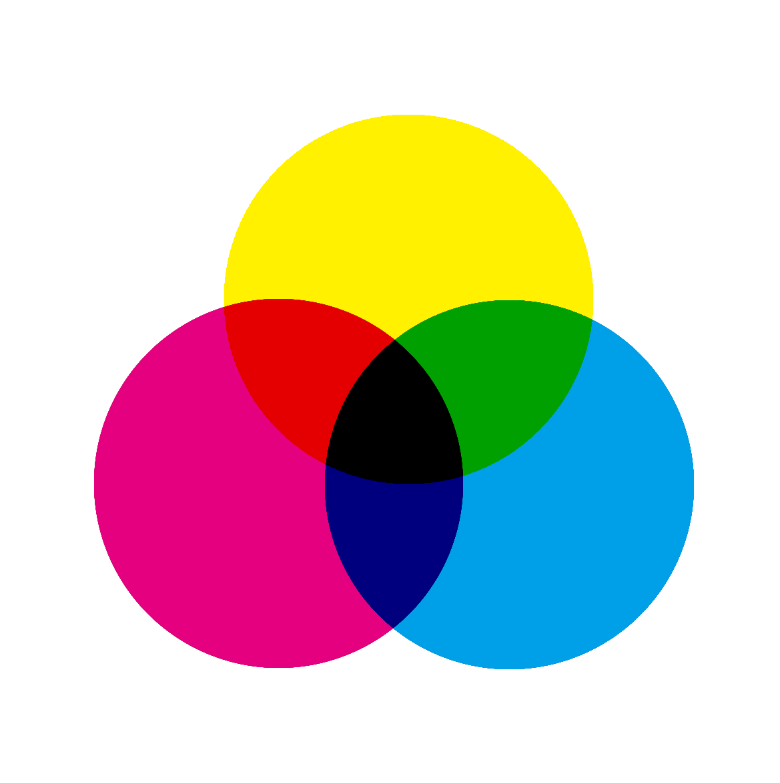

## 9.5 图像的文件格式

1、JPEG<br>



JPEG（Joint Photographic Experts Group）格式是一种**广泛使用**的图像文件格式，以其有**损压**缩技术而闻名，能够在保持相对较高图像质量的同时大幅减小文件大小。JPEG格式特别适合存储和传输彩色照片，但由于其压缩算法会移除一些人眼不易察觉的图像信息，因此不适合需要高质量图像或逐像素精确度的应用场景，如医学成像或法律文件。JPEG文件的扩展名通常是.jpg或.jpeg。

2、PNG<br>



PNG（Portable Network Graphics）格式是一种位图图像文件格式，以其优秀的压缩能力和对图像质量的无损保存而受到青睐。PNG支持**透明度（alpha channel）**，这使得它在网页设计中尤其有用，因为可以创建具有透明背景的图像而无需使用GIF格式。PNG格式提供了比JPEG更好的压缩率，同时保持图像质量不受损失，但由于它是无损压缩，文件大小通常比JPEG格式大，因此PNG更适合保存不需要频繁编辑的图像，如图标、徽标和网页元素。PNG文件的扩展名通常是`.png`。

3、GIF<br>



GIF（Graphics Interchange Format）格式是一种基于矢量的图像文件格式，广泛用于网络上的**动画**和简单图形，支持透明背景和多种颜色的索引颜色模型。GIF格式的主要特点是其动画功能，允许将一系列帧组合成一个动画，这使得它在早期网页设计中非常流行。然而，由于GIF的色深限制（通常为256色），它不适合保存高质量的照片或需要广泛色彩范围的图像。GIF文件的扩展名是`.gif`。

4、TIFF<br>



TIFF（Tagged Image File Format）格式是一种灵活且广泛使用的图像文件格式，主要用于存储**高分辨率的栅格图像**（工业印刷场景），如照片和艺术图形。TIFF支持多种颜色和数据类型，包括黑白、灰度、RGB和CMYK，以及无损和有损压缩选项，使其适用于需要高质量图像保留的专业打印、地理信息系统（GIS）和医学成像等领域。TIFF文件的扩展名通常是`.tif`或`.tiff`。

## 9.6 图像的数字表示

通常数字图像表示为，图片像素的宽度*高度*色彩的通道数<br>



width * height * [R, G, B]色彩通道

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/kaggle/input/new_image.jpg')
#img = cv2.imread('new_image.jpg')

#将图片缩小
width = int(img.shape[1] * 0.05)
height = int(img.shape[0] * 0.05)

resized_img = cv2.resize(img, (width, height), interpolation=cv2.INTER_AREA)

#将BGR通道转化为RGB通道
img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

print(f'图像的宽度为{width}，高度为{height}')
print('第2行第6列的像素值为：', img_rgb[1][5])

## 9.7 边缘检测算法

思考图像中边缘的特征

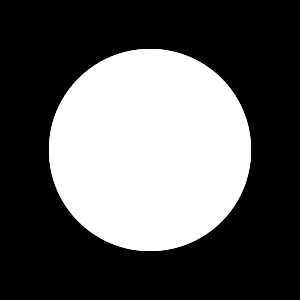

## 9.7.1 Sobel算子(卷积核)

### x轴方向Sobel算子：<br><br>
### ${G_{x}}=\left[\begin{matrix} -1&0&1\\-2&0&2\\-1&0&1 \end{matrix}\right]$
### y轴方向Sobel算子：<br><br>
### ${G_{y}}=\left[\begin{matrix} -1&-2&-1\\0&0&0\\1&2&1 \end{matrix}\right]$

假设有图像共有9个像素，如下所示：<br><br>
### $\left[\begin{matrix} {P_{1}}&{P_{2}}&{P_{3}}\\{P_{4}}&{P_{5}}&{P_{6}}\\{P_{7}}&{P_{8}}&{P_{9}} \end{matrix}\right] = \left[\begin{matrix} 1&2&3\\4&5&6\\7&8&9 \end{matrix}\right]$

现在要计算像素5（${P_{5}}$）x轴方向的梯度，则将像素矩阵乘以x方向的Sobel算子：<br><br>
### $\left[\begin{matrix} {P_{1}}&{P_{2}}&{P_{3}}\\{P_{4}}&{P_{5}}&{P_{6}}\\{P_{7}}&{P_{8}}&{P_{9}} \end{matrix}\right] * \left[\begin{matrix} -1&0&1\\-2&0&2\\-1&0&1 \end{matrix}\right]$
$= (-1)*{P_{1}}+0*{P_{2}}+1*{P_{3}}+(-2)*{P_{4}}+0*{P_{5}}+2*{P_{6}}+(-1)*{P_{7}}+0*{P_{8}}+1*{P_{9}}$
<br><br>
整理后得到：<br>
$= {P_{3}}-{P_{1}}+2*{P_{6}}-2*{P_{4}}+{P_{9}}-{P_{7}}$
<br>
将数值代入：<br>
$=3-1+2*6-2*4+9-7$
<br>
$=8 $
<br>
#### **结果为右边的像素值减左边的像素值**，由于像素4和像素6距离像素5更近，所以像素4和像素6有更高的权重(*2)。<br>
如果左右两边的像素，亮度值差异越大，则它们的梯度越大。<br>
如果像素从左到右，由暗变亮，则梯度为正。<br>
如果像素从左到右，由亮变暗，则梯度为负。<br>

## 9.7.2 卷积

卷积是将一个小型的矩阵（卷积核）滑动遍历整个图像，与图像的局部区域进行元素乘积求和操作，从而生成一个新的特征图。

假设图像共有4*4共16个像素，用Sobel算子卷积计算整个图像的x轴方向的梯度(Gradient):

第一步：计算红框部分像素分别与Sobel算子(卷积核)相乘然后求和：

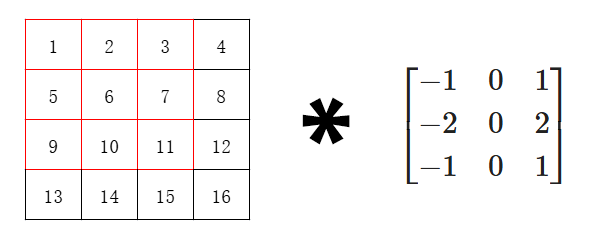

$= {P_{3}}-{P_{1}}+2*{P_{6}}-2*{P_{4}}+{P_{9}}-{P_{7}}$
<br>
将数值代入：<br>
$=3-1+2*6-2*4+9-7$
<br>
$=8 $

第二步：将红框向右移动1格（Strides），到达篮框位置，然后将篮框部分像素分别与Sobel算子相乘然后求和：

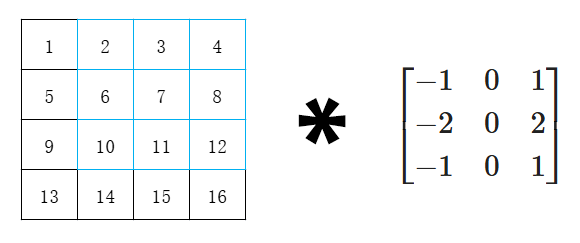

$= {P_{4}}-{P_{2}}+2*{P_{8}}-2*{P_{6}}+{P_{12}}-{P_{10}}$
<br>
将数值代入：<br>
$=4-2+2*8-2*6+12-10$
<br>
$=8 $

第三步：将蓝框向下移动1格（Strides），从最左边开始，到达绿框位置，然后将篮框部分像素分别与Sobel算子相乘然后求和：

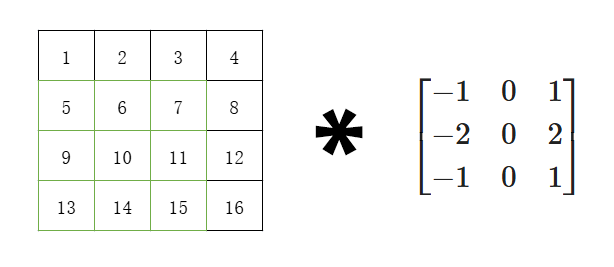

$= {P_{7}}-{P_{5}}+2*{P_{11}}-2*{P_{9}}+{P_{15}}-{P_{13}}$
<br>
将数值代入：<br>
$=7-5+2*11-2*9+15-13$
<br>
$=8 $

第四步：将蓝框向右移动1格（Strides），到达黄框位置，然后将黄框部分像素分别与Sobel算子相乘然后求和：

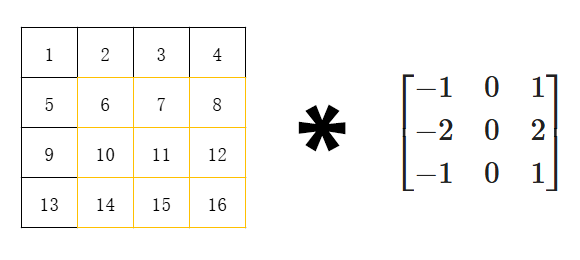

$= {P_{8}}-{P_{6}}+2*{P_{12}}-2*{P_{10}}+{P_{16}}-{P_{14}}$
<br>
将数值代入：<br>
$=8-6+2*12-2*10+16-14$
<br>
$=8 $

最终结果为：

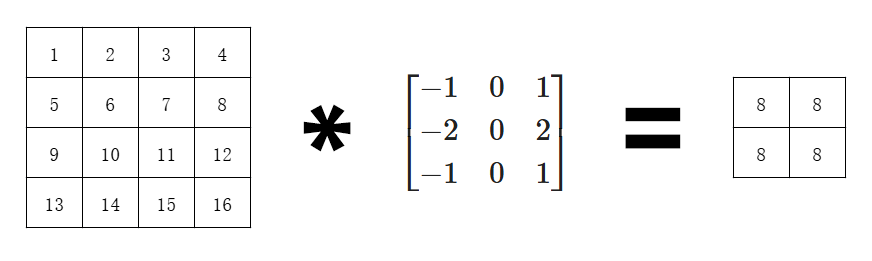

由于计算1个像素的梯度，需要周围像素的信息，所以图像边缘（灰色部分）的像素无法计算梯度，最终4x4像素的图像，计算的梯度矩阵的形状为2x2。

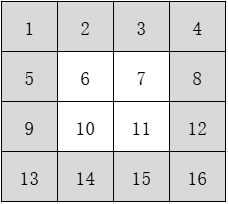

边缘的像素（灰色部分）无法计算梯度，通常情况下，图像的边缘不包含重要的信息，所以边缘部分可以忽略，如果想计算边缘的梯度，可以使用填充的方法（Padding）。

#### 卷积核（Kernel也称Filters）：<br>



用于遍历整个图像的小矩阵，即为卷积核，即上面例子中的Sobel算子。

#### 步长（Strides）：<br>



步长（Strides）是指卷积核在输入图像上滑动时的步长。步长决定了卷积核移动的间距。如果步长为1，卷积核将每次移动一个像素；如果步长为2，卷积核将每次移动两个像素，以此类推。

#### 填充（Padding）：<br>



在上面的例子中，我们无法计算图像边缘的像素，如果我们想计算边缘像素，可以使用填充的方法（Padding），对图像周围填充0，然后进行计算。

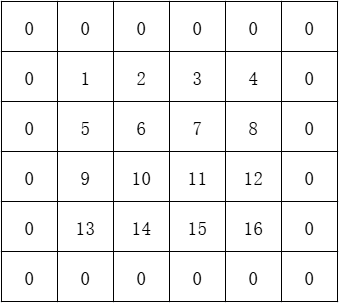

#### 池化(Pooling)：<br>



假设矩阵如图所示：

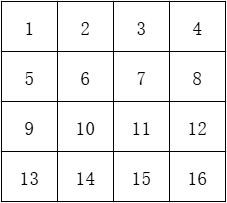

现对矩阵进行**最大值池化**，池化步长为2，先将矩阵分割为2*2的小矩阵：

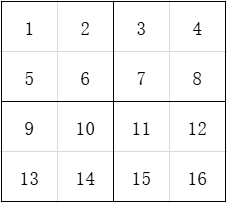

然后选择每个区域的最大值（平均值池化则为计算每个区域的平均值），最大值池化结果为：

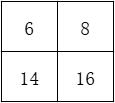

#### 卷积计算后图像尺寸的变化：<br>
卷积层输出尺寸计算：<br>
输入图片尺寸：$n*n$
<br>
卷积核：$f*f$
<br>
步长：$s$
<br>
填充值：$p$
<br>
### $n^` = \left[\dfrac{n+2*p-f}{s} \right] + 1$

## 9.7.3 使用Sobel算子进行边缘检测

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('/kaggle/input/-3.jpg')
#img = cv2.imread('3.jpg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 使用Sobel算子计算x方向的梯度
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)

# 使用Sobel算子计算y方向的梯度
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# 将梯度转换为uint8类型
sobelx_a = np.uint8(np.absolute(sobelx))
sobely_a = np.uint8(np.absolute(sobely))

# 合并x和y方向的梯度
sobel = cv2.bitwise_or(sobelx_a, sobely_a)

fig = plt.Figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(img_rgb)  # 将BGR转换为RGB
plt.plot(49, 149, 'ro')
plt.title('Original Image')
plt.axis('off')  # 关闭坐标轴

plt.subplot(222)
plt.imshow(sobelx, cmap='gray')  # 将BGR转换为RGB
plt.title('Sobel X Gradient')
plt.axis('off')  # 关闭坐标轴

plt.subplot(223)
plt.imshow(sobely, cmap='gray')  # 将BGR转换为RGB
plt.title('Sobel Y Gradient')
plt.axis('off')  # 关闭坐标轴

plt.subplot(224)
plt.imshow(sobel, cmap='gray')  # 将BGR转换为RGB
plt.title('Sobel Edge Detection')
plt.axis('off')  # 关闭坐标轴

# 显示图像
plt.show()

print('红点处的像素值为：')
for x in gray[148:151]:
    print(x[48:51])

#print('红点处的x方向梯度值为：')
#print(sobelx[149][49])

上图中红点处的梯度为：<br><br>
$\left[\begin{matrix} 0&255&255\\0&255&255\\0&255&255 \end{matrix}\right] * \left[\begin{matrix} -1&0&1\\-2&0&2\\-1&0&1 \end{matrix}\right]$
<br><br>
$=0*(-1)+255*0+255*1+0*(-2)+255*0+255*2+0*(-1)+255*0+255*1$
<br><br>
$=1020$

## 9.7.4 使用Sobel算子进行边缘检测的完整步骤<br>



1、将图像转化为灰度<br>



2、对图像进行平滑处理<br>



3、计算x、y方向的梯度<br>



4、合并x、y方便的梯度，进行边缘检测<br>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('/kaggle/input/-3.jpg')
#img = cv2.imread('snowpea.jpg')

#将BGR通道转化为RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#转化为灰度
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#高斯模糊
blurred_image = cv2.GaussianBlur(gray, (5, 5), 0)

# 使用Sobel算子计算x方向的梯度
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)

# 使用Sobel算子计算y方向的梯度
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# 将梯度转换为uint8类型
sobelx = np.uint8(np.absolute(sobelx))
sobely = np.uint8(np.absolute(sobely))

# 合并x和y方向的梯度
sobel = cv2.bitwise_or(sobelx, sobely)

fig = plt.Figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(img_rgb)  # 将BGR转换为RGB
plt.title('Original Image')
plt.axis('off')  # 关闭坐标轴

plt.subplot(222)
plt.imshow(gray, cmap='gray')  # 将BGR转换为RGB
plt.title('Convert to Grayscale')
plt.axis('off')  # 关闭坐标轴

plt.subplot(223)
plt.imshow(blurred_image, cmap='gray')  # 将BGR转换为RGB
plt.title('Gaussian Blur')
plt.axis('off')  # 关闭坐标轴

plt.subplot(224)
plt.imshow(sobel, cmap='gray')  # 将BGR转换为RGB
plt.title('Sobel Edge Detection')
plt.axis('off')  # 关闭坐标轴

# 显示图像
plt.show()

## 9.8 使用canny()函数进行边缘检测

In [ ]:
import matplotlib.pyplot as plt
import cv2

# 读取图像
img = cv2.imread('/kaggle/input/snowpea.jpg')

#将BGR转化为RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 将图像转换为灰度图
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 使用Canny边缘检测
edges = cv2.Canny(gray_image, threshold1=50, threshold2=150)

# 显示结果
fig = plt.Figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(img_rgb)  # 将BGR转换为RGB
plt.title('Original Image')
plt.axis('off')  # 关闭坐标轴

plt.subplot(122)
plt.imshow(edges, cmap='gray')  # 将BGR转换为RGB
plt.title('Edge Detection')
plt.axis('off')  # 关闭坐标轴
plt.show()